In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="whitegrid")

In [2]:
qb_urls = {
    "Tom Brady": "https://www.pro-football-reference.com/players/B/BradTo00.htm",
    "Peyton Manning": "https://www.pro-football-reference.com/players/M/MannPe00.htm",
    "Aaron Rodgers": "https://www.pro-football-reference.com/players/R/RodgAa00.htm",
    "Patrick Mahomes": "https://www.pro-football-reference.com/players/M/MahoPa00.htm",
    "Joe Montana": "https://www.pro-football-reference.com/players/M/MontJo01.htm",
}

In [12]:
def load_qb_passing(name, url):
    tables = pd.read_html(url)

    passing = None

    for t in tables:
        df = t.copy()

        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.get_level_values(-1)

        cols = list(df.columns)

        if (("Season" in cols) or ("Year" in cols)) and ("Yds" in cols):
            passing = df
            break

    if passing is None:
        raise ValueError(f"Season-level passing table not found for {name}. Columns last seen: {cols}")

    if "Season" in passing.columns:
        passing = passing.rename(columns={"Season": "Year"})

    passing = passing[passing["Year"].astype(str) != "Year"]

    passing = passing[passing["Year"].astype(str).str.match(r"^\d{4}$")]

    passing["Player"] = name

    return passing

In [16]:
frames = []

for name, url in qb_urls.items():
    df_qb = load_qb_passing(name, url)
    frames.append(df_qb)

qbs_raw = pd.concat(frames, ignore_index=True)
qbs_raw.head()

,Year,Age,Team,Lg,Pos,G,GS,QBrec,Cmp,Att,...,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,AV,Awards,Player
0,2000,23,NWE,NFL,QB,1,0,NaN,1,3,...,0,0,0.00,2.00,2.00,0,0,0,NaN,Tom Brady
1,2001,24,NWE,NFL,QB,15,14,11-3-0,264,413,...,41,216,9.03,5.79,5.39,3,3,12,PB,Tom Brady
2,2002,25,NWE,NFL,QB,16,16,9-7-0,373,601,...,31,190,4.91,5.66,5.54,2,3,13,NaN,Tom Brady
3,2003,26,NWE,NFL,QB,16,16,14-2-0,317,527,...,32,219,5.72,6.08,5.94,3,5,11,AP MVP-3,Tom Brady
4,2004,27,NWE,NFL,QB,16,16,14-2-0,288,474,...,26,162,5.20,7.06,6.92,0,1,16,PB,Tom Brady


In [20]:
cols_keep = ["Year", "Team", "G", "Yds", "TD", "Int", "Rate", "Player"]

qbs = qbs_raw[cols_keep].copy()

qbs["Year"] = pd.to_numeric(qbs["Year"], errors="coerce")

for col in ["G", "Yds", "TD", "Int", "Rate"]:
    qbs[col] = pd.to_numeric(qbs[col], errors="coerce")

qbs = qbs.dropna(subset=["Year"])

qbs.head()

,Year,Team,G,Yds,TD,Int,Rate,Player
0,2000,NWE,1.0,6.0,0.0,0.0,42.4,Tom Brady
1,2001,NWE,15.0,2843.0,18.0,12.0,86.5,Tom Brady
2,2002,NWE,16.0,3764.0,28.0,14.0,85.7,Tom Brady
3,2003,NWE,16.0,3620.0,23.0,12.0,85.9,Tom Brady
4,2004,NWE,16.0,3692.0,28.0,14.0,92.6,Tom Brady


In [21]:
qbs["TD_INT_ratio"] = qbs["TD"] / qbs["Int"].replace(0, np.nan)

qbs["yards_per_game"] = qbs["Yds"] / qbs["G"]

qbs[["Player", "Year", "TD", "Int", "TD_INT_ratio", "yards_per_game"]].head(10)

,Player,Year,TD,Int,TD_INT_ratio,yards_per_game
0,Tom Brady,2000,0.0,0.0,NaN,6.000000
1,Tom Brady,2001,18.0,12.0,1.500000,189.533333
2,Tom Brady,2002,28.0,14.0,2.000000,235.250000
3,Tom Brady,2003,23.0,12.0,1.916667,226.250000
4,Tom Brady,2004,28.0,14.0,2.000000,230.750000
5,Tom Brady,2005,26.0,14.0,1.857143,256.875000
6,Tom Brady,2006,24.0,12.0,2.000000,220.562500
7,Tom Brady,2007,50.0,8.0,6.250000,300.375000
8,Tom Brady,2008,0.0,0.0,NaN,76.000000
9,Tom Brady,2009,28.0,13.0,2.153846,274.875000


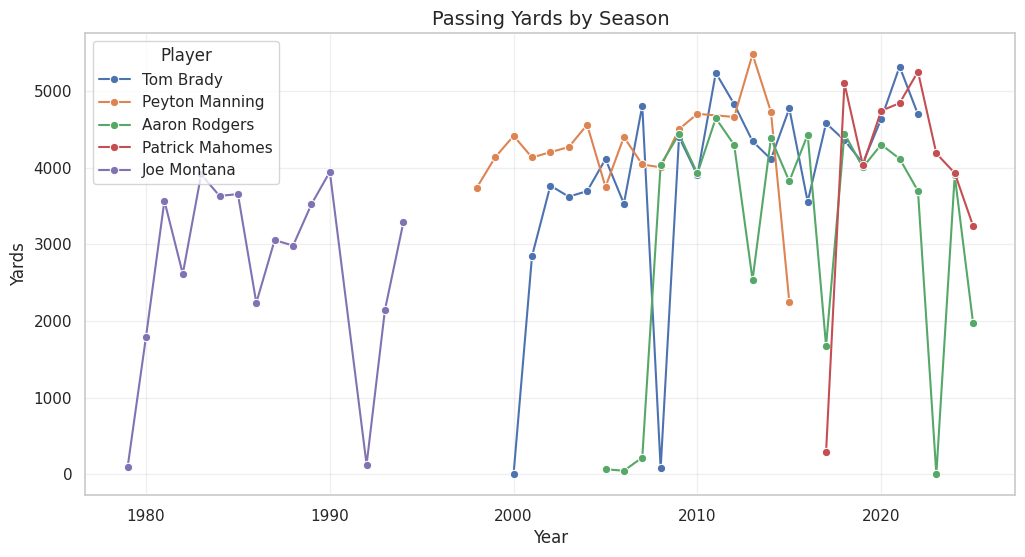

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(data=qbs, x="Year", y="Yds", hue="Player", marker="o")
plt.title("Passing Yards by Season", fontsize=14)
plt.ylabel("Yards")
plt.xlabel("Year")
plt.grid(True, alpha=0.3)
plt.show()

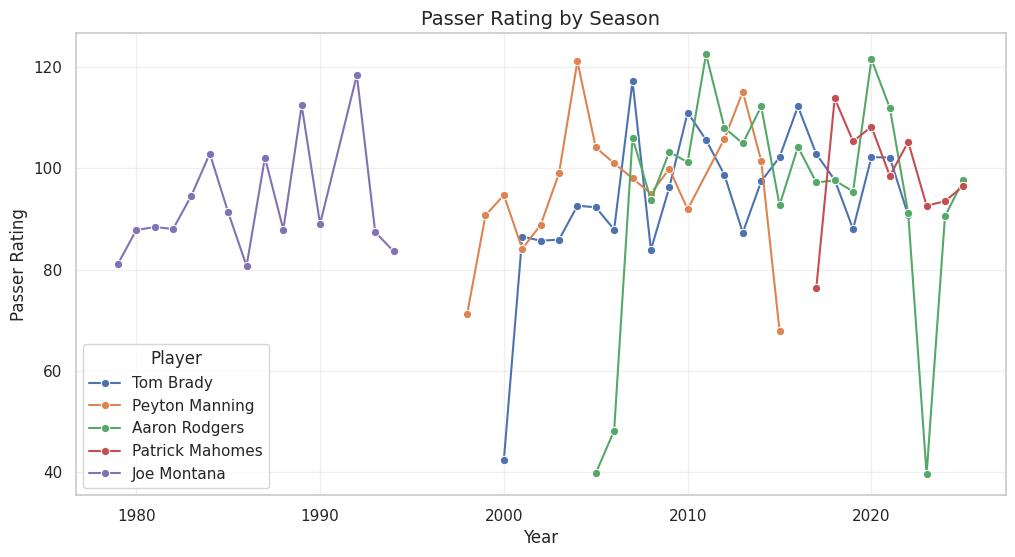

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(data=qbs, x="Year", y="Rate", hue="Player", marker="o")
plt.title("Passer Rating by Season", fontsize=14)
plt.ylabel("Passer Rating")
plt.xlabel("Year")
plt.grid(True, alpha=0.3)
plt.show()

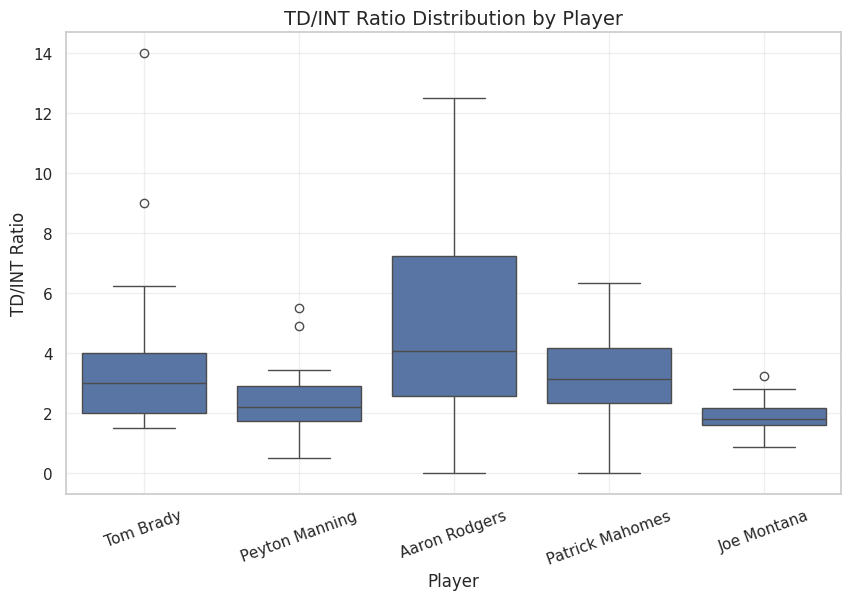

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=qbs, x="Player", y="TD_INT_ratio")
plt.title("TD/INT Ratio Distribution by Player", fontsize=14)
plt.xlabel("Player")
plt.ylabel("TD/INT Ratio")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=20)
plt.show()

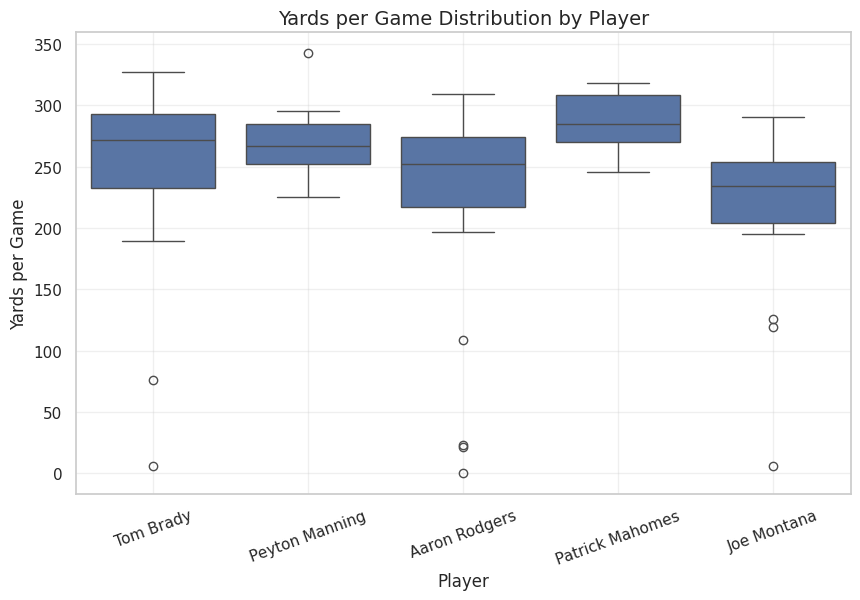

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=qbs, x="Player", y="yards_per_game")
plt.title("Yards per Game Distribution by Player", fontsize=14)
plt.xlabel("Player")
plt.ylabel("Yards per Game")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=20)
plt.show()

In [26]:
brady_ratio = qbs.loc[qbs["Player"] == "Tom Brady", "TD_INT_ratio"].dropna()
others_ratio = qbs.loc[qbs["Player"] != "Tom Brady", "TD_INT_ratio"].dropna()

t_stat, p_val = stats.ttest_ind(brady_ratio, others_ratio, equal_var=False)
t_stat, p_val

(np.float64(0.8052086521283447), np.float64(0.42690141723357444))

🧪 Hypothesis Test Result: Efficiency Advantage

To evaluate whether Tom Brady’s per-season passing efficiency surpasses that of other elite quarterbacks, a two-sample t-test was performed using season-level TD/INT ratios.

	•	Null Hypothesis (H₀): Brady’s TD/INT ratios are not significantly different from other elite quarterbacks.
  
	•	Alternative Hypothesis (H₁): Brady’s TD/INT ratios are significantly higher.

Results:
The test yielded t = 0.805 and p = 0.427.
Since p > 0.05, we fail to reject the null hypothesis.
This indicates that Brady’s passing efficiency is not statistically different from his peers. His GOAT reputation appears to stem not from per-season efficiency metrics but from longevity, consistency, volume, and postseason success rather than pure efficiency.